In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df=df.drop(columns=['Email No.'])
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [5]:
word_counts = df.drop(columns=['Prediction']).sum().sort_values(ascending=False)
print("Most common words:\n", word_counts.head(10))


Most common words:
 e    438561
t    312791
a    287136
o    284970
n    248777
i    237177
r    234874
s    216251
l    160317
c    154690
dtype: int64


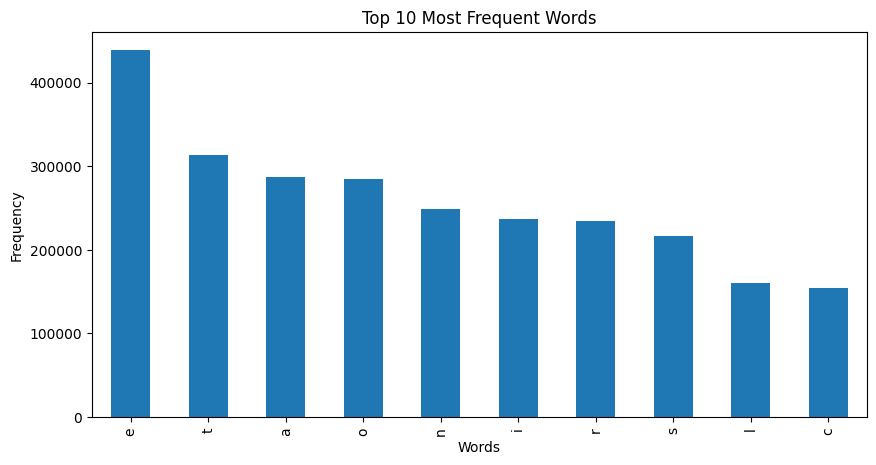

In [8]:
word_counts.head(10).plot(kind='bar', figsize=(10, 5))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.show()


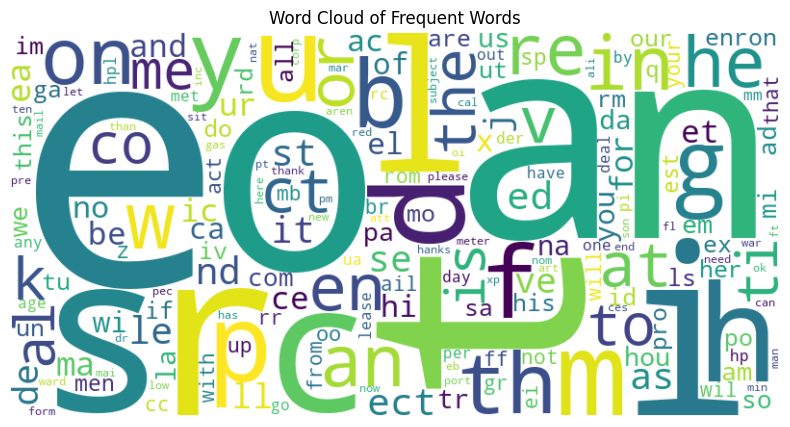

In [9]:
from wordcloud import WordCloud

# Create a dictionary of word frequencies for the word cloud
word_freq_dict = word_counts.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()


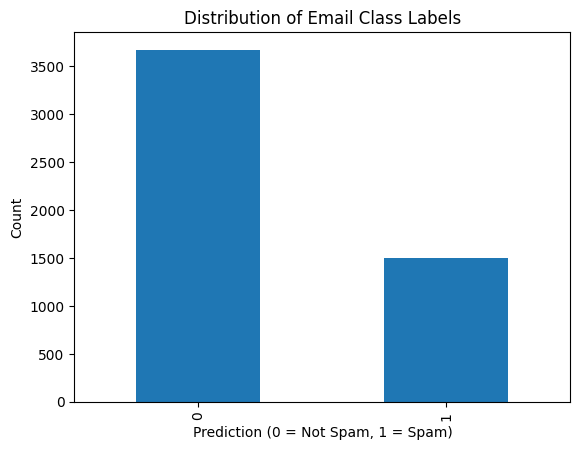

In [16]:
df['Prediction'].value_counts().plot(kind='bar')
plt.xlabel("Prediction (0 = Not Spam, 1 = Spam)")
plt.ylabel("Count")
plt.title("Distribution of Email Class Labels")
plt.show()


<AxesSubplot: ylabel='Prediction'>

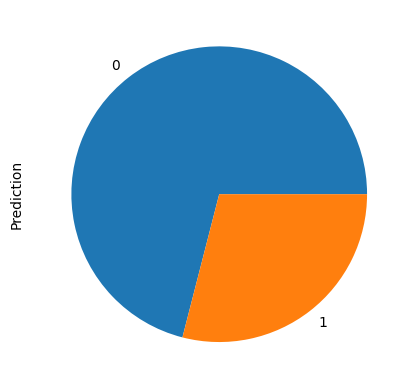

In [17]:
df['Prediction'].value_counts().plot(kind='pie')

In [19]:
spam_word_counts = df[df['Prediction'] == 1].drop(columns=['Prediction']).sum().sort_values(ascending=False)
non_spam_word_counts = df[df['Prediction'] == 0].drop(columns=['Prediction']).sum().sort_values(ascending=False)

print("Top words in spam emails:\n", spam_word_counts.head(10))
print("Top words in non-spam emails:\n", non_spam_word_counts.head(10))


Top words in spam emails:
 total_words    6564594
e               151062
t               109878
a               105425
o               103997
i               100761
n                90840
r                89645
s                83720
l                58852
dtype: int64
Top words in non-spam emails:
 total_words    11516037
e                287499
t                202913
a                181711
o                180973
n                157937
r                145229
i                136416
s                132531
l                101465
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Prediction', axis=1)
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       739
           1       0.81      0.77      0.79       296

    accuracy                           0.88      1035
   macro avg       0.86      0.85      0.85      1035
weighted avg       0.88      0.88      0.88      1035



In [ ]:
from sklearn.metrics import classification_report , confusion_matrix 
print(confusion_matrix(y_test,y_pred))

In [26]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       739
           1       0.50      0.04      0.07       296

    accuracy                           0.71      1035
   macro avg       0.61      0.51      0.45      1035
weighted avg       0.66      0.71      0.61      1035



In [ ]:
from sklearn.metrics import classification_report , confusion_matrix 
print(confusion_matrix(y_test,y_pred))